In [1]:
import torch

layer_id = [0,31]
dense = []

for id in layer_id:
    dense.append(torch.load(f'../../cache/llama/qkvout_l{id}.pth', map_location=torch.device('cpu')))

In [2]:
dense[0]['attn'].shape

torch.Size([1, 1, 4096, 4096])

In [3]:
dense[0]['attn']

tensor([[[[ 0.0000e+00, -3.3895e+38, -3.3895e+38,  ..., -3.3895e+38,
           -3.3895e+38, -3.3895e+38],
          [ 0.0000e+00,  0.0000e+00, -3.3895e+38,  ..., -3.3895e+38,
           -3.3895e+38, -3.3895e+38],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -3.3895e+38,
           -3.3895e+38, -3.3895e+38],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           -3.3895e+38, -3.3895e+38],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00, -3.3895e+38],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]]]], dtype=torch.bfloat16)

In [4]:
default = []
for l in [0, 31]:
    default.append(torch.load(f'../../cache/llama/ensemble/qkvout_ensbn5_mft1_bmk0_ltNone_l{l}.pth', map_location=torch.device('cpu')))

In [5]:
default[0].keys()

dict_keys(['q', 'k', 'v', 'indices', 'ks', 'attn', 'out', 'ensemble', 'ensemble_model_setting', 'ensemble_method', 'ensemble_method_final', 'ensemble_method_final_inter_thresh', 'ensemble_method_final_bdd_mask_k', 'ensemble_per_layer_n', 'ensemble_per_attn_iter_n', 'ensemble_model_n', 'ensemble_particular_layer', 'ensemble_layer_till', 'layer_id'])

In [6]:
default[0]['indices'].shape

torch.Size([32, 47, 64])

In [7]:
import torch

ensemble_model_n = 20
ensemble_method_final_inter_thresh = [5, 10, 15, 20] # 4,5
ensemble_method_final_bdd_mask_k = [0,1]
lt = 32
ld = [0,31]

tlist = []

for thr in ensemble_method_final_inter_thresh:
    for l in ld:
        for bdd in ensemble_method_final_bdd_mask_k:
            # for lt in ensemble_layer_till:
                t = torch.load(f'../../cache/llama/ensemble/qkvout_ensbn{ensemble_model_n}_mft{thr}_bmk{bdd}_lt{lt}_l{l}.pth', map_location=torch.device('cpu'))
                tlist.append(t)

In [8]:
tlist[0].keys()

dict_keys(['q', 'k', 'v', 'indices', 'ks', 'attn', 'out', 'ensemble', 'ensemble_model_setting', 'ensemble_method', 'ensemble_method_final', 'ensemble_method_final_inter_thresh', 'ensemble_method_final_bdd_mask_k', 'ensemble_per_layer_n', 'ensemble_per_attn_iter_n', 'ensemble_model_n', 'ensemble_particular_layer', 'ensemble_layer_till', 'layer_id'])

In [9]:
for tl in tlist:
    print(tl['indices'].shape)

torch.Size([32, 128, 421])
torch.Size([32, 128, 256])
torch.Size([32, 128, 423])
torch.Size([32, 128, 256])
torch.Size([32, 128, 288])
torch.Size([32, 128, 256])
torch.Size([32, 128, 284])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])


In [10]:
tlist[0]

{'q': tensor([[[[ 2.8906e-01, -1.5703e+00,  2.2188e+00,  ..., -7.5781e-01,
             5.8203e-01, -8.6719e-01],
           [ 4.6094e-01, -8.1250e-01,  1.1797e+00,  ..., -7.2266e-01,
             5.6250e-01, -8.2031e-01],
           [ 7.8906e-01, -1.9531e+00,  2.0469e+00,  ..., -8.3984e-01,
             6.8750e-01, -1.0156e+00],
           ...,
           [ 5.2734e-01,  8.7109e-01,  1.2031e+00,  ..., -5.8203e-01,
             1.7480e-01, -8.4766e-01],
           [ 1.0938e-01,  1.3906e+00,  1.5781e+00,  ..., -1.0234e+00,
             8.0859e-01, -1.1406e+00],
           [-1.3672e-02,  1.8594e+00,  1.4062e+00,  ..., -1.0859e+00,
             7.8906e-01, -1.1797e+00]],
 
          [[ 5.0964e-03,  1.1475e-01, -4.5703e-01,  ...,  5.1172e-01,
            -9.6094e-01,  6.2109e-01],
           [ 4.9805e-01,  5.2979e-02, -1.5625e+00,  ..., -5.4688e-01,
             4.0820e-01, -5.3516e-01],
           [ 1.0449e-01,  4.8340e-02, -5.9766e-01,  ...,  2.2461e-01,
            -6.3672e-01,  3.0078e-

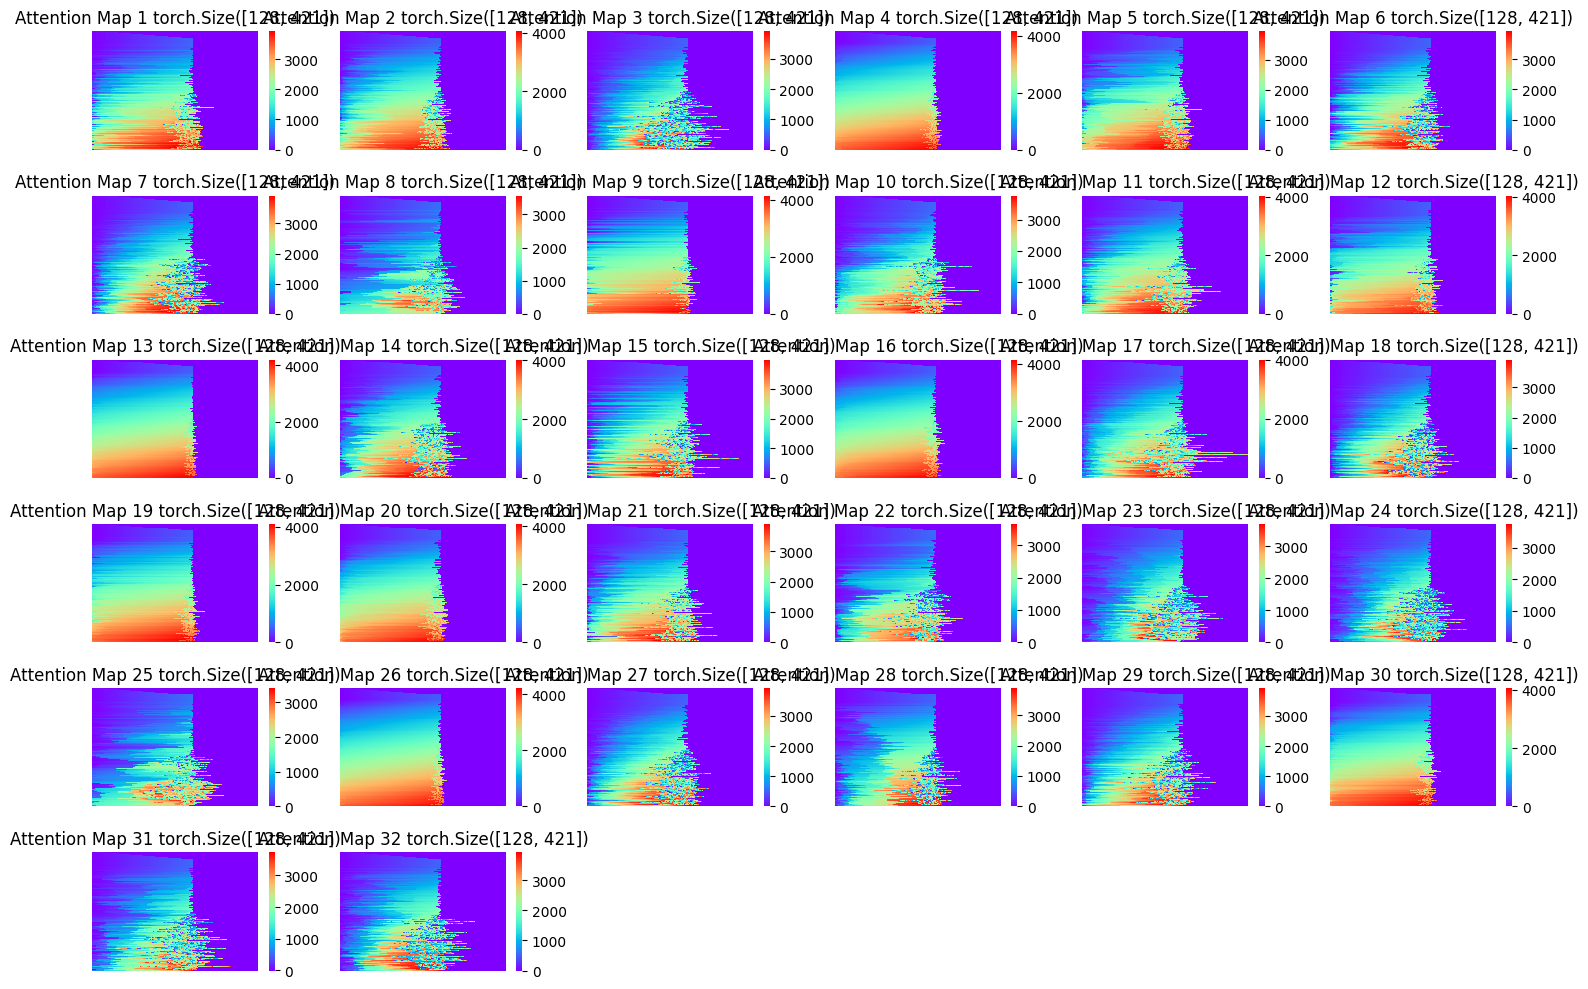

In [11]:
import torch
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Function to plot a grid of heatmaps for attention maps
def plot_attention_maps(tensor, cmap='rainbow'):
    num_attention_maps = tensor.shape[0]
    grid_cols = math.ceil(math.sqrt(num_attention_maps))
    grid_rows = math.ceil(num_attention_maps / grid_cols)
    mask = (tensor == 32000)
    tensor = torch.where(mask, -1, tensor)
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < tensor.shape[0]:
            sns.heatmap(tensor[i][:], ax=ax, cmap=cmap, cbar=True)
            ax.set_title(f'Attention Map {i+1} {tensor[i].shape}')
            ax.axis('off')  # Optional: Hide the axis ticks
        else:
            ax.axis('off')  # Hide unused plots
    plt.tight_layout()
    plt.show()

# Calculate the number of rows and columns for the grid


# Plot the attention maps with a specific colormap
plot_attention_maps(tlist[0]['indices'], cmap='rainbow')  # Change cmap as needed

In [12]:
tlist[1]

{'q': tensor([[[[ 5.0781e-01, -1.2109e+00,  2.1250e+00,  ..., -9.3359e-01,
             8.0078e-01, -1.0859e+00],
           [ 5.8203e-01, -1.5625e+00,  2.0469e+00,  ..., -9.2578e-01,
             7.5391e-01, -1.0547e+00],
           [ 9.0234e-01, -1.6406e+00,  1.8828e+00,  ..., -8.3984e-01,
             6.6797e-01, -9.9219e-01],
           ...,
           [ 8.2812e-01,  1.5547e+00,  1.3438e+00,  ..., -6.4062e-01,
             2.2070e-01, -9.2188e-01],
           [ 3.6328e-01,  1.9375e+00,  1.5547e+00,  ..., -9.9219e-01,
             7.2656e-01, -1.1484e+00],
           [-7.2266e-02,  2.0156e+00,  1.4062e+00,  ..., -1.1016e+00,
             8.5938e-01, -1.2031e+00]],
 
          [[ 2.0605e-01, -8.8501e-03, -9.6094e-01,  ...,  8.3008e-02,
            -3.4570e-01,  1.2158e-01],
           [ 2.1289e-01,  5.5176e-02, -8.8281e-01,  ...,  2.7710e-02,
            -3.4961e-01,  8.1543e-02],
           [ 6.0059e-02,  2.0508e-02, -7.5781e-01,  ...,  2.1875e-01,
            -6.2891e-01,  3.0469e-

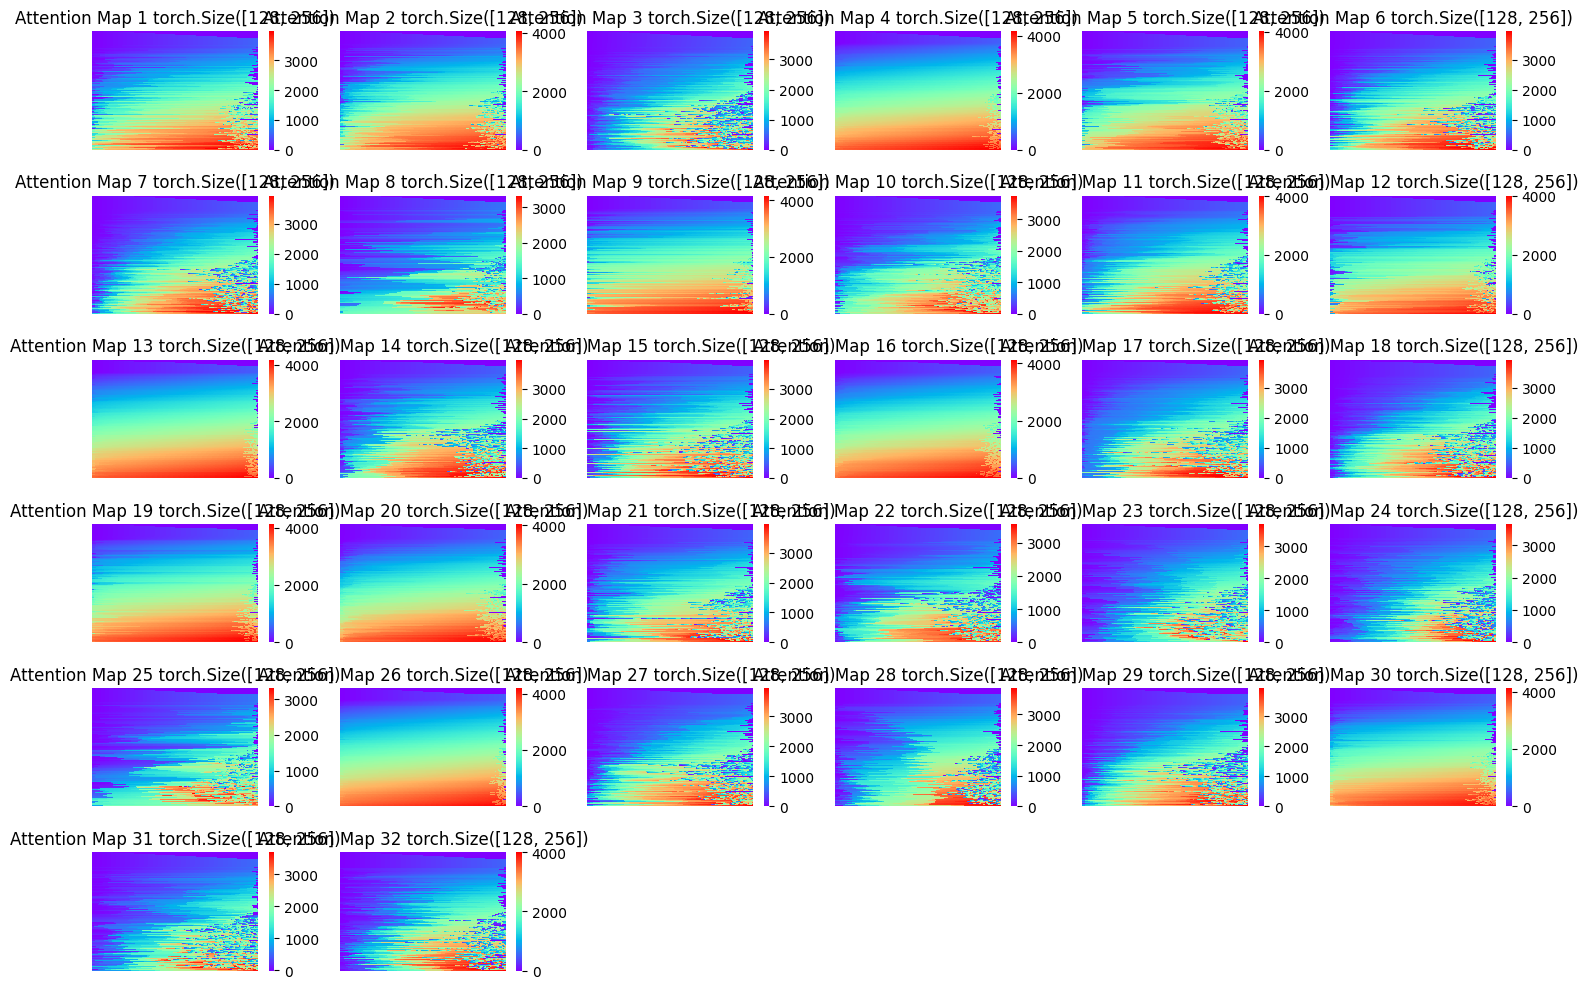

In [13]:
plot_attention_maps(tlist[1]['indices'], cmap='rainbow')  # Change cmap as needed


In [14]:
tlist[2]

{'q': tensor([[[[ 0.4375, -0.5117,  0.3125,  ..., -1.1250,  0.7305,  0.2051],
           [-0.5391, -0.2832,  0.0293,  ..., -0.3223,  1.0000, -0.4395],
           [-0.2148, -0.8633,  0.1035,  ..., -0.0265,  1.3828, -0.6328],
           ...,
           [-0.4727,  0.3652, -0.8945,  ..., -0.8984,  0.6641, -0.2773],
           [-0.6680, -0.0781, -0.6289,  ...,  2.4375,  3.3750,  0.8008],
           [-0.0684, -0.9375, -0.8164,  ...,  1.4375,  1.6484,  0.9805]],
 
          [[ 4.8750, -0.7500,  0.4453,  ...,  0.1865,  0.4395,  0.7695],
           [ 1.1562,  0.1836,  0.5977,  ..., -0.2002, -0.4160,  1.3672],
           [ 1.1094, -0.1426,  0.0242,  ...,  0.2910,  0.6484,  0.3281],
           ...,
           [-1.0547,  0.8828, -0.3594,  ...,  0.8047,  0.3711,  0.0210],
           [-0.7539, -0.1797,  0.1914,  ...,  0.2891,  2.0312,  1.6719],
           [-0.7578, -0.0190, -0.3867,  ..., -0.6211,  1.0312,  0.8242]],
 
          [[-0.0339, -0.3105, -0.8203,  ..., -0.3691,  0.5781, -1.2812],
        

In [15]:
# plot_attention_maps(tlist[2]['indices'], cmap='rainbow')  # Change cmap as needed
# 

In [16]:
tlist[3]


{'q': tensor([[[[ 3.9453e-01, -5.0781e-01,  3.1641e-01,  ..., -1.1094e+00,
             7.3047e-01,  1.8848e-01],
           [-5.9766e-01, -6.4453e-01, -6.0156e-01,  ..., -1.6504e-01,
             9.2969e-01, -6.9531e-01],
           [-6.6406e-01, -4.1016e-01, -6.5234e-01,  ..., -7.0312e-01,
             1.6406e+00, -6.4941e-02],
           ...,
           [ 2.5977e-01, -3.3398e-01, -1.4062e+00,  ..., -5.1172e-01,
             1.0352e-01,  8.7891e-01],
           [ 7.7344e-01, -5.5469e-01, -2.3594e+00,  ...,  8.2031e-01,
             8.4375e-01,  3.2959e-02],
           [ 5.8594e-02, -2.9688e-01, -1.2891e+00,  ...,  6.6406e-01,
            -1.8262e-01, -6.2500e-01]],
 
          [[ 4.8750e+00, -7.4219e-01,  4.4922e-01,  ...,  1.9531e-01,
             4.6094e-01,  7.7734e-01],
           [ 6.2891e-01,  4.4922e-01, -5.0659e-03,  ...,  1.4141e+00,
             1.1562e+00, -8.8281e-01],
           [ 7.0703e-01,  7.3047e-01,  7.3828e-01,  ...,  4.0820e-01,
             1.2812e+00, -7.2656e-

In [17]:
# plot_attention_maps(tlist[3]['indices'], cmap='rainbow')  # Change cmap as needed


In [18]:
tlist[4]

{'q': tensor([[[[ 5.0781e-01, -1.2109e+00,  2.1250e+00,  ..., -9.3359e-01,
             8.0078e-01, -1.0859e+00],
           [ 5.8203e-01, -1.5625e+00,  2.0469e+00,  ..., -9.2578e-01,
             7.5391e-01, -1.0547e+00],
           [ 9.0234e-01, -1.6406e+00,  1.8828e+00,  ..., -8.3984e-01,
             6.6797e-01, -9.9219e-01],
           ...,
           [ 8.2812e-01,  1.5547e+00,  1.3438e+00,  ..., -6.4062e-01,
             2.2070e-01, -9.2188e-01],
           [ 3.6328e-01,  1.9375e+00,  1.5547e+00,  ..., -9.9219e-01,
             7.2656e-01, -1.1484e+00],
           [-7.2266e-02,  2.0156e+00,  1.4062e+00,  ..., -1.1016e+00,
             8.5938e-01, -1.2031e+00]],
 
          [[ 2.0605e-01, -8.8501e-03, -9.6094e-01,  ...,  8.3008e-02,
            -3.4570e-01,  1.2158e-01],
           [ 2.1289e-01,  5.5176e-02, -8.8281e-01,  ...,  2.7710e-02,
            -3.4961e-01,  8.1543e-02],
           [ 6.0059e-02,  2.0508e-02, -7.5781e-01,  ...,  2.1875e-01,
            -6.2891e-01,  3.0469e-

In [19]:
# plot_attention_maps(tlist[4]['indices'], cmap='rainbow')  # Change cmap as needed


In [20]:
tlist[5]

{'q': tensor([[[[ 5.0781e-01, -1.2109e+00,  2.1250e+00,  ..., -9.3359e-01,
             8.0078e-01, -1.0859e+00],
           [ 5.8203e-01, -1.5625e+00,  2.0469e+00,  ..., -9.2578e-01,
             7.5391e-01, -1.0547e+00],
           [ 9.0234e-01, -1.6406e+00,  1.8828e+00,  ..., -8.3984e-01,
             6.6797e-01, -9.9219e-01],
           ...,
           [ 8.2812e-01,  1.5547e+00,  1.3438e+00,  ..., -6.4062e-01,
             2.2070e-01, -9.2188e-01],
           [ 3.6328e-01,  1.9375e+00,  1.5547e+00,  ..., -9.9219e-01,
             7.2656e-01, -1.1484e+00],
           [-7.2266e-02,  2.0156e+00,  1.4062e+00,  ..., -1.1016e+00,
             8.5938e-01, -1.2031e+00]],
 
          [[ 2.0605e-01, -8.8501e-03, -9.6094e-01,  ...,  8.3008e-02,
            -3.4570e-01,  1.2158e-01],
           [ 2.1289e-01,  5.5176e-02, -8.8281e-01,  ...,  2.7710e-02,
            -3.4961e-01,  8.1543e-02],
           [ 6.0059e-02,  2.0508e-02, -7.5781e-01,  ...,  2.1875e-01,
            -6.2891e-01,  3.0469e-

In [21]:
# plot_attention_maps(tlist[5]['indices'], cmap='rainbow')  # Change cmap as needed

In [22]:
import torch

tree_k = [512, 256, 128]
layer_id = [0,31]
default = []

for id in layer_id:
    for k in tree_k:
        default.append(torch.load(f'../../cache/llama/default/qkvout_k{k}_l{id}.pth', map_location=torch.device('cpu')))

In [23]:
default[0]

{'q': tensor([[[[ 0.3027, -0.7070,  1.2344,  ..., -0.6914,  0.5195, -0.8281],
           [ 0.5312, -1.5781,  2.1562,  ..., -0.9531,  0.7695, -1.0547],
           [ 0.7344, -1.1484,  1.6719,  ..., -0.8555,  0.7148, -0.9453],
           ...,
           [-1.1797,  0.4414, -0.1758,  ..., -0.7773,  0.4023, -0.8633],
           [-1.0938,  0.3789, -0.2432,  ..., -0.7773,  0.4023, -0.8633],
           [-0.9727,  0.3047, -0.3105,  ..., -0.7773,  0.4023, -0.8633]],
 
          [[ 0.3906, -0.0309, -1.5234,  ..., -0.5078,  0.3535, -0.4961],
           [ 0.1260,  0.0430, -0.7461,  ...,  0.1719, -0.5664,  0.2471],
           [ 0.3457, -0.0347, -1.3516,  ..., -0.1562, -0.0266, -0.1270],
           ...,
           [ 2.0156,  1.8906, -0.3242,  ..., -0.2578,  0.1553, -0.2373],
           [ 2.2812,  2.0312, -0.2285,  ..., -0.2578,  0.1553, -0.2373],
           [ 2.5000,  2.1562, -0.1270,  ..., -0.2578,  0.1553, -0.2373]],
 
          [[-0.6602, -0.5195, -0.5352,  ..., -0.4375, -0.3867, -0.3789],
        

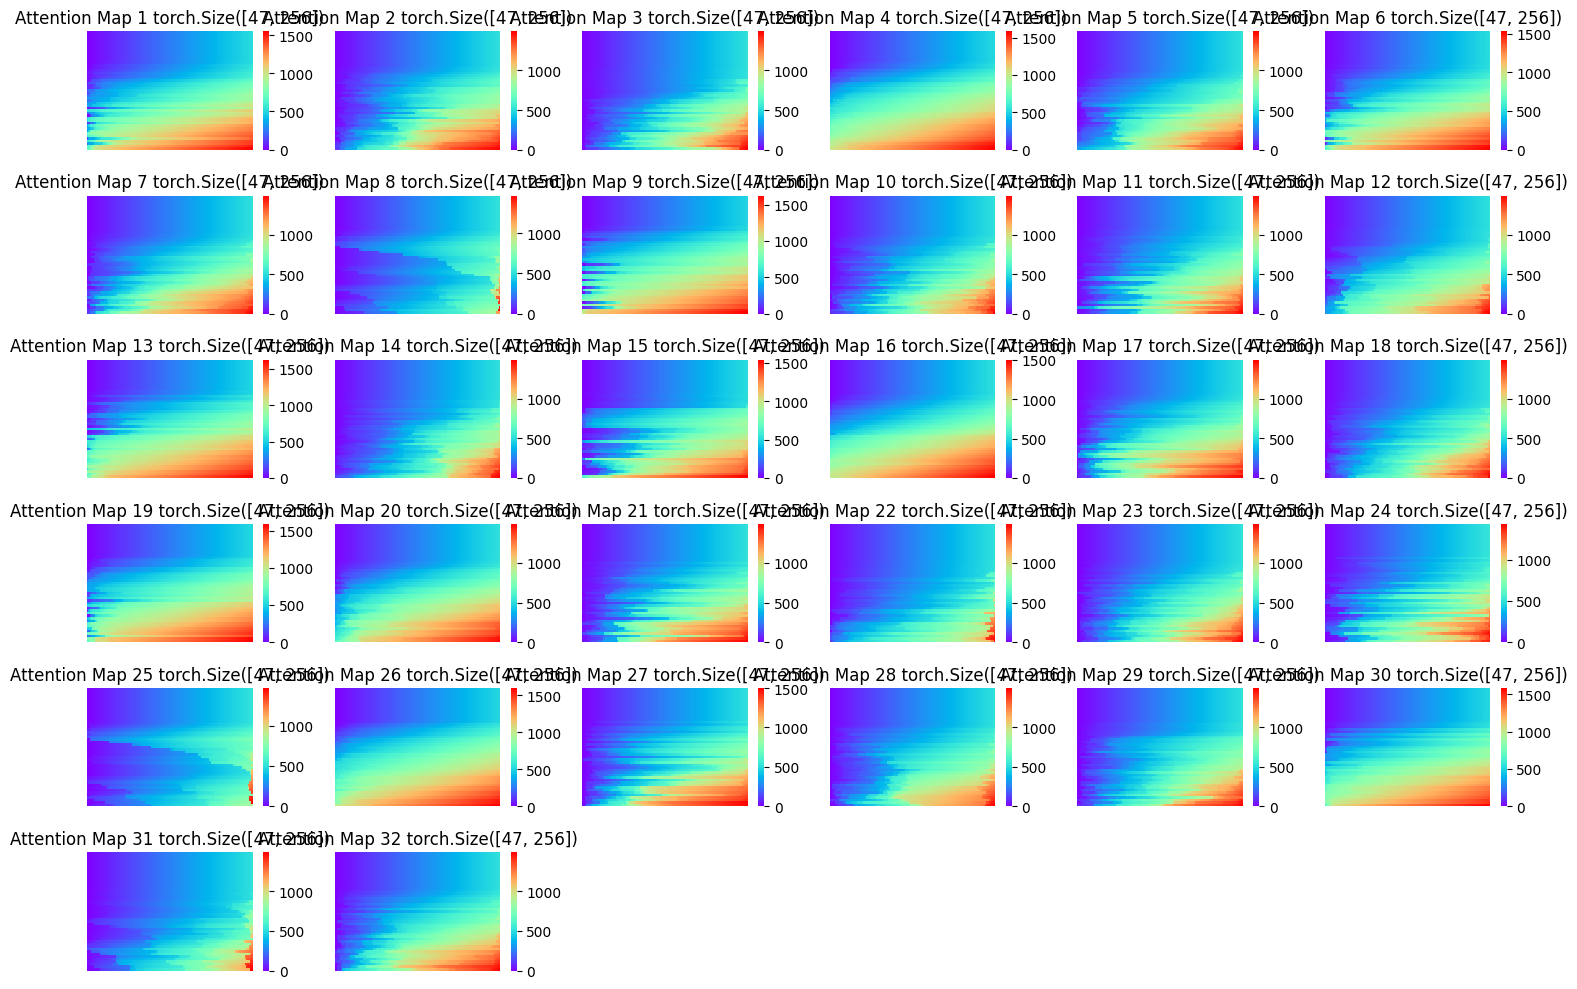

In [24]:
plot_attention_maps(default[0]['indices'], cmap='rainbow')  # Change cmap as needed


In [25]:
default[0]['q'].shape,
default[0]['k'].shape,

(torch.Size([1, 32, 1500, 128]),)

In [26]:
default[0]['indices']

tensor([[[   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         ...,
         [ 270,  272,  360,  ..., 1436, 1438, 1440],
         [ 648,  650,  652,  ..., 1494, 1496, 1498],
         [ 672,  674,  676,  ..., 1546, 1548, 1550]],

        [[   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         ...,
         [  72,   74,   76,  ..., 1420, 1430, 1432],
         [ 108,  110,  112,  ..., 1452, 1462, 1464],
         [ 104,  106,  108,  ..., 1484, 1490, 1492]],

        [[   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         [   0,    2,    4,  ...,  506,  508,  510],
         ...,
         [   0,    2,    4,  ..., 1420, 1430, 1432],
         [   0,    2,    4,  ..., 1452, 1462, 1464],
         [   0,    2,    4,  ..., 1480, 1490, 1492]],

In [27]:
tlist[0]['indices']

tensor([[[0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         ...,
         [2.6300e+03, 2.6320e+03, 2.6340e+03,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [1.7660e+03, 1.7680e+03, 1.7700e+03,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [2.7200e+02, 2.7400e+02, 2.7600e+02,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04]],

        [[0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         [0.0000e+00, 2.0000e+00, 4.0000e+00,  ..., 3.2000e+04,
          3.2000e+04, 3.2000e+04],
         ...,
         [2.7320e+03, 2.7340e+03, 2.7360e+03,  ..., 3.2000e+04,
          3.200